In [2]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
#import plotly
#import plotly.figure_factory as ff
#from plotly.graph_objs import Scatter, Layout

#plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_json('tops_fashion.json')
data

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183133,None,B01MSALTSO,OUTERWEAR,$14.58,None,Black,TOOGOO(R),None,Usually ships in 1-2 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,TOOGOO(R) Women's Tops Spring Autumn Casual Pu...,089106A4,https://images-na.ssl-images-amazon.com/images...,None,<b>* TOOGOO is a registered trademark. ONLY Au...
183134,None,B015W98YQK,SHIRT,None,None,Monochrome Plaid,VOGUE CODE,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,VOGUE CODE Vintage V Neck Plaid Shirt Sleevele...,None,https://images-na.ssl-images-amazon.com/images...,None,"SIZE CHART <p> XS for length of front 27.6""; l..."
183135,None,B075756PGC,SHIRT,None,None,Pink,Wrangler,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Wrangler George Strait For Her Long Sleeve Pin...,LGS7089,https://images-na.ssl-images-amazon.com/images...,None,Pretty pink print button down Western shirt fr...
183136,None,B074L8FVTT,SHIRT,$44.99,None,Rose,susana monaco,susana monaco,Usually ships in 2-3 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,Susana Monaco Womens Susana Monoco Sleeveless ...,None,https://images-na.ssl-images-amazon.com/images...,susana monaco,Color/pattern: rose. Approximately 23in from s...


In [3]:
print(data.shape[0], data.shape[1])

183138 19


In [4]:
#list out all the columns
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [5]:
# We will be considering 7 features of 19
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [6]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


In [7]:
data.shape[1]

7

In [8]:
#describe the Product name
print(data['product_type_name'].describe())

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [9]:
print(data['product_type_name'].unique())
len(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

72

In [10]:
product_type_count = Counter((data['product_type_name']))
(product_type_count.most_common(10))

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [11]:
# Do this for brand as well
data['brand'].describe()

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object

In [12]:
brand_count =Counter((data['brand']))
(brand_count.most_common(10))

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [13]:
print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [14]:
color_count = Counter(data['color'])
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [15]:
data['formatted_price'].describe()

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object

In [16]:
price_count = Counter(data['formatted_price'])
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [17]:
data['title'].describe()

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object

In [18]:
data.to_pickle('pickles/180k_apparel_data')

In [19]:
data = data.loc[~data['formatted_price'].isnull()]
data.shape[0]

28395

In [20]:
data = data.loc[~data['color'].isnull()]
data.shape[0]

28385

In [21]:
data.to_pickle('pickles/28k_apparel_data')

In [22]:
# To Download Images
'''
from PIL import Image
import requests
from io import BytesIO

for index, row in data.iterrows():
        url = row['medium_image_url']
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.save('images/'+row['asin']+'.jpeg')
        
'''

"\nfrom PIL import Image\nimport requests\nfrom io import BytesIO\n\nfor index, row in data.iterrows():\n        url = row['medium_image_url']\n        response = requests.get(url)\n        img = Image.open(BytesIO(response.content))\n        img.save('images/'+row['asin']+'.jpeg')\n        \n"

In [23]:
data = pd.read_pickle('pickles/28k_apparel_data')
(data.duplicated('title'))
print(sum(data.duplicated('title')))

2325


In [24]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50


In [25]:
data[:6]

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,$7.39


In [26]:
# Remove all products with nvery few words in the title
data_sorted = data[data['title'].apply(lambda x : len(x.split()) > 4)]
data_sorted.shape

(27949, 7)

In [27]:
# Sort the data based on title
data_sorted.sort_values('title', inplace = True, ascending = False)

In [28]:
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


In [29]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

indices

[61973,
 133820,
 81461,
 75995,
 151570,
 152506,
 76209,
 103647,
 138588,
 95954,
 74338,
 18905,
 60078,
 59030,
 177229,
 22273,
 135865,
 171318,
 44082,
 40331,
 60603,
 56982,
 39370,
 120006,
 8424,
 139484,
 94413,
 167267,
 92382,
 93518,
 101522,
 74087,
 51286,
 35796,
 73818,
 127730,
 37902,
 164994,
 125784,
 129103,
 161966,
 151598,
 100567,
 102610,
 80880,
 74066,
 167810,
 100898,
 86604,
 153020,
 168828,
 97684,
 83173,
 37290,
 17234,
 130798,
 128762,
 38107,
 32240,
 141241,
 37911,
 142996,
 115660,
 163170,
 73633,
 132135,
 42468,
 69292,
 32217,
 169883,
 108966,
 68893,
 115422,
 141090,
 80785,
 92051,
 165541,
 150090,
 163741,
 123456,
 57588,
 116686,
 170034,
 160212,
 144984,
 142244,
 141432,
 118353,
 101884,
 110314,
 140321,
 76493,
 135579,
 85390,
 78409,
 158069,
 148089,
 100597,
 140457,
 137999,
 147641,
 94653,
 120825,
 145597,
 114795,
 98140,
 148772,
 80202,
 113184,
 79120,
 93161,
 86422,
 103918,
 157939,
 99504,
 85577,
 133860,
 

In [30]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    previous_i = i
    
    a = data['title'].loc[indices[i]].split()
    
    j = i+1
    
    while j< num_data_points:
        
        b = data['title'].loc[indices[j]].split()
        
        length = max(len(a), len(b))
        
        count = 0
        
        for k in itertools.zip_longest(a,b):
            if(k[0] == k[1]):
                count+=1
        
        if ( length-count) > 2:
            
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
        
            if j == num_data_points-1:
                stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])
                
            i = j
            break
            
        else:
            j += 1
        
    if previous_i == i:
        break
        

In [31]:
len(stage1_dedupe_asins)

17593

In [32]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [33]:
data.shape

(17593, 7)

In [34]:
data.to_pickle('pickles/17k_apparel_data')

In [35]:
data = pd.read_pickle('pickles/17k_apparel_data')
data

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,$13.53
...,...,...,...,...,...,...,...
183081,B01MRV2IFS,YueLian,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,YueLian Women's Chiffon Short Sleeves Sun Prot...,$19.25
183092,B01LY4QWLF,Vintage America,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Vintage America Women's Large Lace Up Collared...,$23.24
183096,B07167SCNH,Tart Collections,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,"Tart Womens Collections Ann Wrap Top, Xs, Black",$29.99
183101,B07575N2WX,Soprano,Gray,https://images-na.ssl-images-amazon.com/images...,SHIRT,Soprano Womens Small Tie-Fringe Slub-Knit Tank...,$22.83


In [ ]:
'''
indices = []

for i,row in data.iterrows():
    indices.append(i)
    
indices

'''

In [ ]:
'''stage2_dedupe_asins = []
while len(indices) != 0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    
    a = data['title'].loc[i].split()
    
    for j in indices:
        
        b = data['title'].loc[j].split()
        
        
        length = max(len(a), len(b))
        
        count = 0
        
        for k in itertools.zip_longest(a,b):
            if( k[0] == k[1]):
                count+=1
        
        if (length - count) < 3:
            indices.remove(j)
            
'''

# text Processing

In [38]:
data.shape

(17593, 7)

In [13]:
data = pd.read_pickle('pickles/17k_apparel_data')

In [14]:
stop_words = set(stopwords.words('english'))
print("list of stop words : ", stop_words)

def nlp_preprocessing(total_text , index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            word = ("".join(e for e in words if e.isalnum()))
            word = word.lower()
            
            if not word in stop_words:
                string += word + " "
            
        data[column][index] = string

list of stop words :  {'our', 'before', 'once', 'no', "hadn't", 'up', 'is', 'each', 'how', 'any', 'm', 'few', 'hers', 're', 'doesn', 'down', 'had', 'shan', 'as', 'who', 'it', 'same', 'being', 'this', 'themselves', 'they', 'just', "won't", 'we', 'my', 'their', "aren't", 'so', 'me', 'yours', 'off', 'wouldn', 'those', 'mustn', "you've", 'd', 'these', 'herself', "hasn't", 'ain', 'have', 'while', "mightn't", 'through', "she's", 'shouldn', 'am', 'own', 'then', 'over', 'yourselves', 'other', "shouldn't", 'but', 'during', 'ourselves', 'll', 'y', 'your', 'when', 'whom', 'most', 'or', 'some', "you're", 'if', 'won', 'his', 's', 'both', 'on', 'an', 'to', 'theirs', 'she', 'are', 'than', "mustn't", 'do', "that'll", "you'll", 'which', 'mightn', 'with', 'after', 'should', 'too', 'were', 'against', "wasn't", 'hasn', 'the', 'why', "wouldn't", 'weren', 'and', 've', 'here', "needn't", "weren't", 'been', 'out', "didn't", "don't", 'in', 'doing', 'a', "should've", 'aren', 'yourself', 'from', 'by', 'isn', "ha

In [15]:
data['title'].head()

4     Featherlite Ladies' Long Sleeve Stain Resistan...
6     Women's Unique 100% Cotton T - Special Olympic...
15    FeatherLite Ladies' Moisture Free Mesh Sport S...
27    Supernatural Chibis Sam Dean And Castiel O Nec...
43    Featherlite Ladies' Silky Smooth Pique (White)...
Name: title, dtype: object

# Text based product Similarity

In [16]:
data.to_pickle('pickles/17k_apparel_data_preprocessed')

In [17]:
data = pd.read_pickle('pickles/17k_apparel_data_preprocessed')
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,$13.53


In [18]:
#Display an image

def display_img(url, ax, fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)

In [22]:
def plot_heatmap(keys, values, labels, url, text):
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1])
    fig = plt.figure(figsize=(25,3))
        
    # 1st, ploting heat map that represents the count of commonly ocurred words in title2
    ax = plt.subplot(gs[0])
    # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
    ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
    ax.set_xticklabels(keys) # set that axis labels as the words of title
    ax.set_title(text) # apparel title

    # 2nd, plotting image of the the apparel
    ax = plt.subplot(gs[1])
    # we don't want any grid lines for image and no labels on x-axis and y-axis
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    # we call dispaly_img based with paramete url
    display_img(url, ax, fig)

    # displays combine figure ( heat map and image together)
    plt.show()
    
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):
    
    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 
    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0
            
    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    labels = values
    
    plot_heatmap(keys, values, labels, url, text)
    
    
    
    
# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}




def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

# Bag of Words (BOW)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features = title_vectorizer.fit_transform(data['title'])
title_features.shape

(17593, 11360)

In [27]:
data2 = pd.read_pickle('pickles/17k_apparel_data')

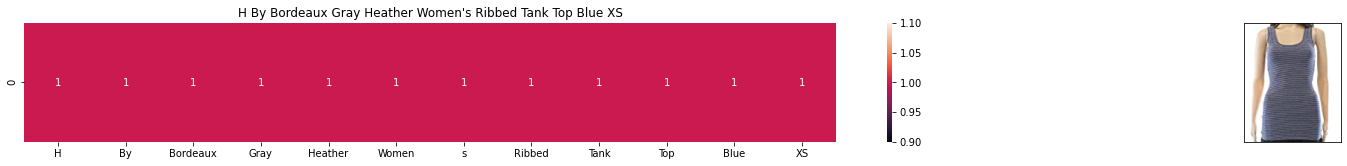

ASIN : B06XDPPF93
Brand: H By Bordeaux
Title: H By Bordeaux Gray Heather Women's Ribbed Tank Top Blue XS
Euclidean similarity with the query image : 0.0


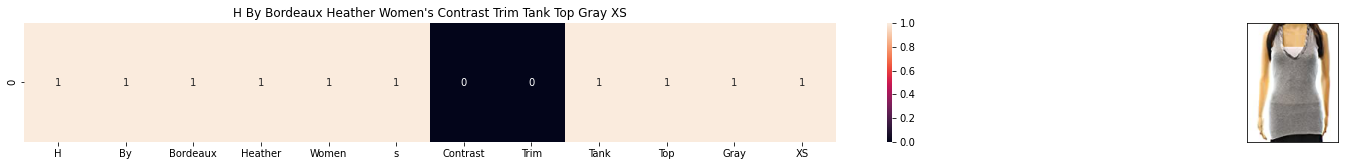

ASIN : B072J9J3YP
Brand: H By Bordeaux
Title: H By Bordeaux Heather Women's Contrast Trim Tank Top Gray XS
Euclidean similarity with the query image : 2.0


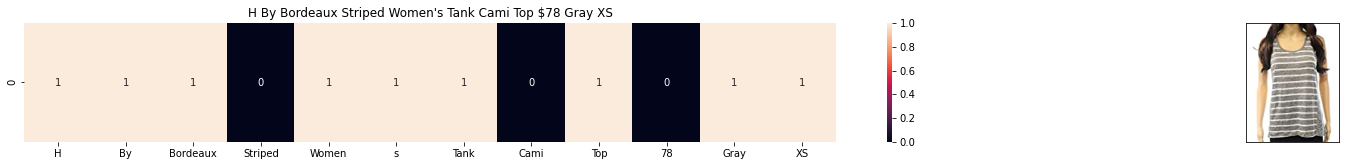

ASIN : B06X9VYDBK
Brand: H By Bordeaux
Title: H By Bordeaux Striped Women's Tank Cami Top $78 Gray XS
Euclidean similarity with the query image : 2.449489742783178


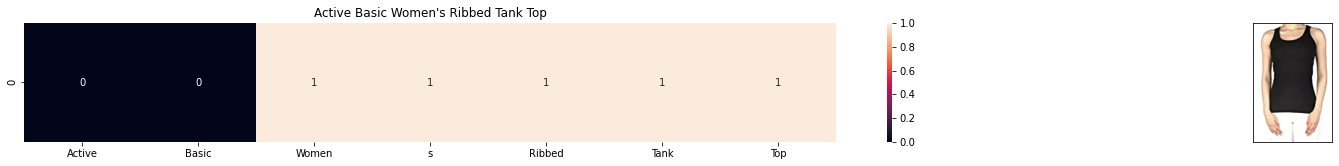

ASIN : B00B7B09SE
Brand: Active Products
Title: Active Basic Women's Ribbed Tank Top
Euclidean similarity with the query image : 2.8284271247461903


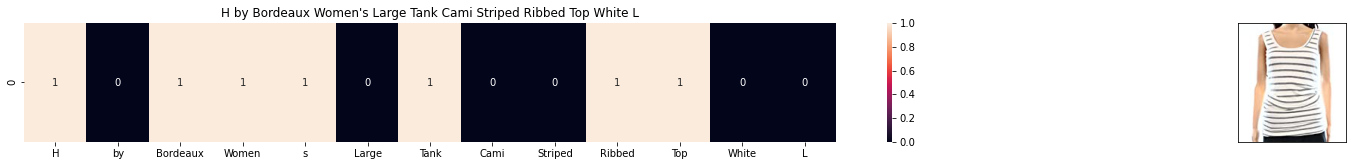

ASIN : B074PYQD5D
Brand: H By Bordeaux
Title: H by Bordeaux Women's Large Tank Cami Striped Ribbed Top White L
Euclidean similarity with the query image : 2.8284271247461903


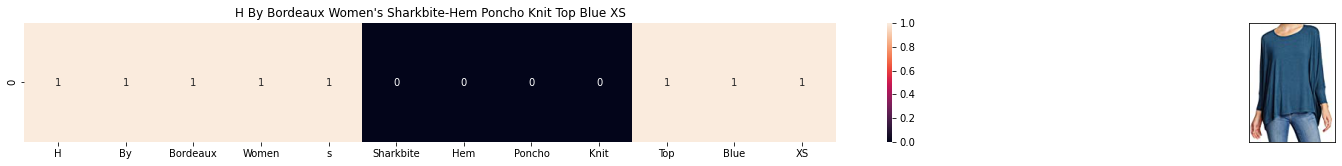

ASIN : B06XDPXC76
Brand: H By Bordeaux
Title: H By Bordeaux Women's Sharkbite-Hem Poncho Knit Top Blue XS
Euclidean similarity with the query image : 2.8284271247461903


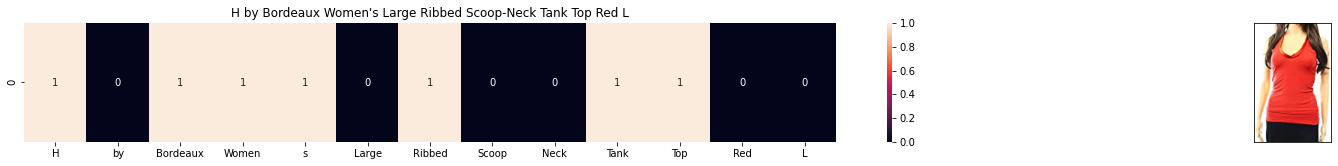

ASIN : B071W19QVB
Brand: H By Bordeaux
Title: H by Bordeaux Women's Large Ribbed Scoop-Neck Tank Top Red L
Euclidean similarity with the query image : 2.8284271247461903


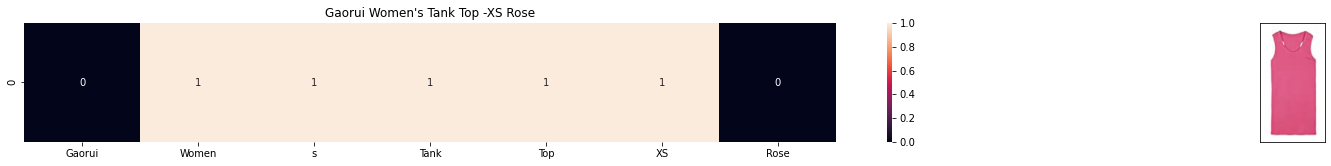

ASIN : B00ENWZ204
Brand: Gaorui
Title: Gaorui Women's Tank Top -XS Rose
Euclidean similarity with the query image : 2.8284271247461903


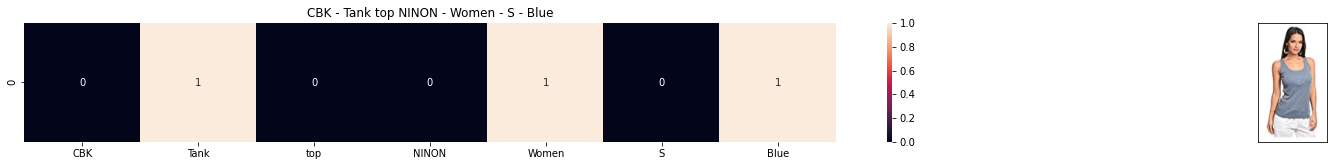

ASIN : B072HFSQ6H
Brand: CBK
Title: CBK - Tank top NINON - Women - S - Blue
Euclidean similarity with the query image : 2.8284271247461903


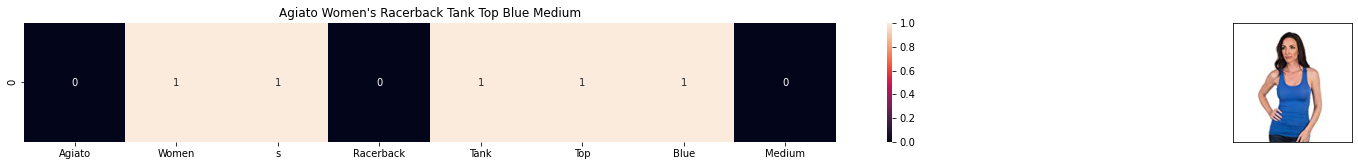

ASIN : B00T3MUUJM
Brand: Agiato Apparel
Title: Agiato Women's Racerback Tank Top Blue Medium
Euclidean similarity with the query image : 3.0


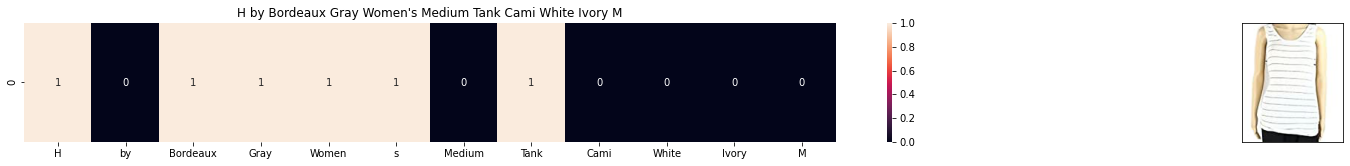

ASIN : B074MJH44S
Brand: H By Bordeaux
Title: H by Bordeaux Gray Women's Medium Tank Cami White Ivory M
Euclidean similarity with the query image : 3.0


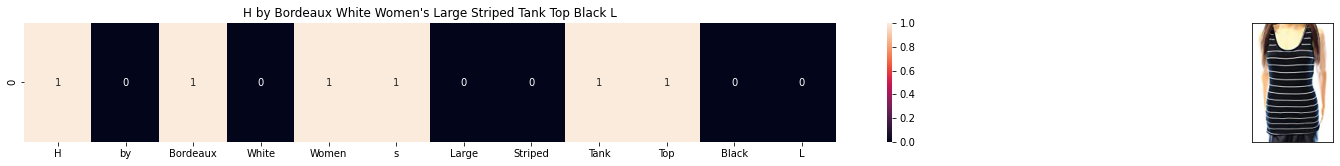

ASIN : B01MSH5UCH
Brand: H By Bordeaux
Title: H by Bordeaux White Women's Large Striped Tank Top Black L
Euclidean similarity with the query image : 3.0


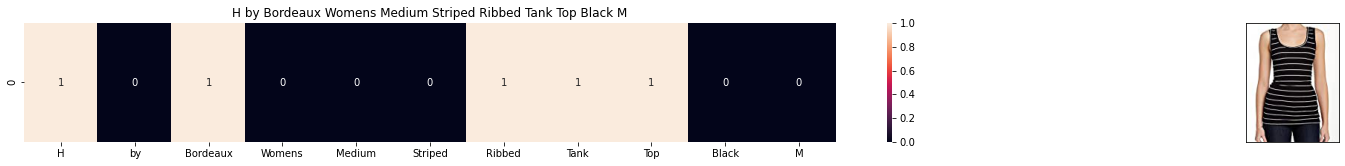

ASIN : B07574D8KQ
Brand: H By Bordeaux
Title: H by Bordeaux Womens Medium Striped Ribbed Tank Top Black M
Euclidean similarity with the query image : 3.0


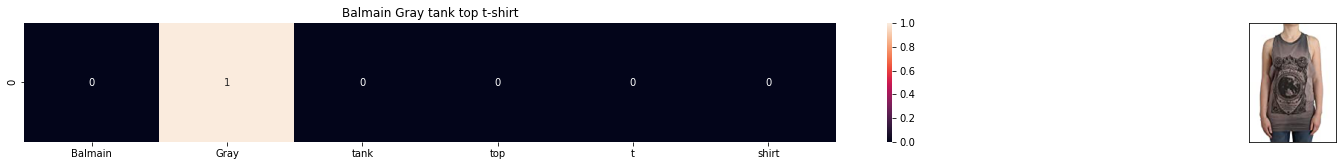

ASIN : B074G5TZ9G
Brand: Balmain
Title: Balmain Gray tank top t-shirt
Euclidean similarity with the query image : 3.0


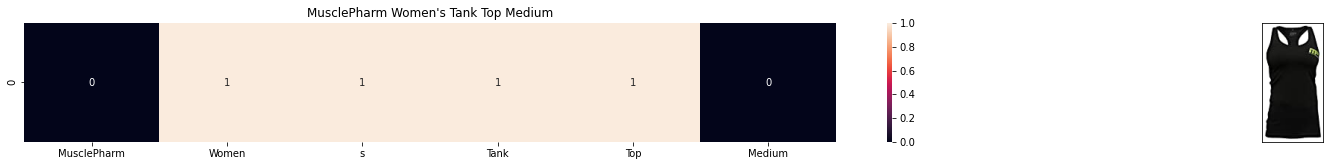

ASIN : B00I1KEPSO
Brand: Muscle Pharm
Title: MusclePharm Women's Tank Top Medium
Euclidean similarity with the query image : 3.0


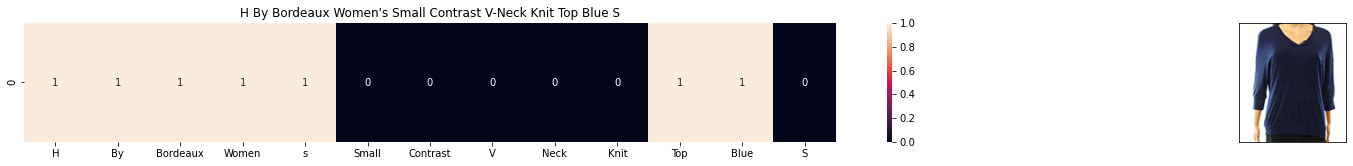

ASIN : B07319JPQN
Brand: H By Bordeaux
Title: H By Bordeaux Women's Small Contrast V-Neck Knit Top Blue S
Euclidean similarity with the query image : 3.0


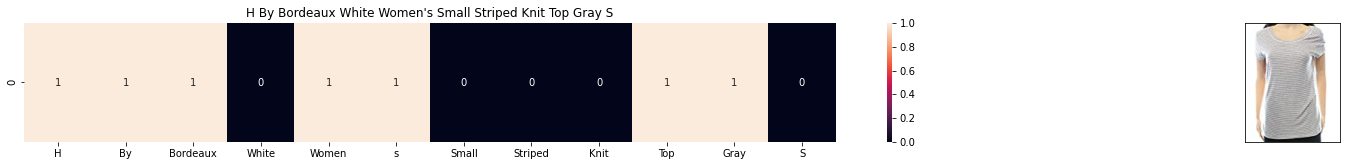

ASIN : B01MYEW2TZ
Brand: H By Bordeaux
Title: H By Bordeaux White Women's Small Striped Knit Top Gray S
Euclidean similarity with the query image : 3.0


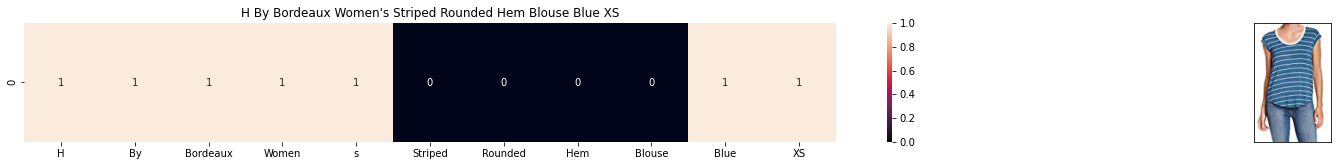

ASIN : B01NBKXG7S
Brand: H By Bordeaux
Title: H By Bordeaux Women's Striped Rounded Hem Blouse Blue XS
Euclidean similarity with the query image : 3.0


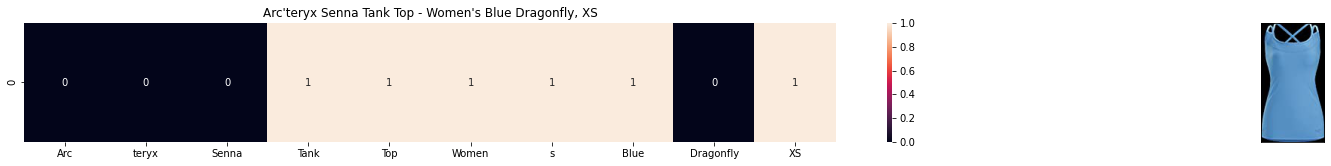

ASIN : B00ZKF4TLG
Brand: Arc'teryx
Title: Arc'teryx Senna Tank Top - Women's Blue Dragonfly, XS
Euclidean similarity with the query image : 3.0


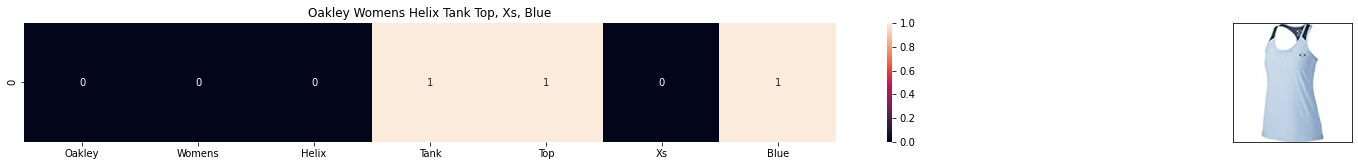

ASIN : B00VIDZIXC
Brand: Oakley
Title: Oakley Womens Helix Tank Top, Xs, Blue
Euclidean similarity with the query image : 3.0


In [28]:
def bag_of_words_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(title_features, title_features[doc_id])
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data2['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

        
        
bag_of_words_model(5001, 20)
    